## Contents
1) Importing libraries and dataframe
2) Visual check of loaded dataframe (columns names and original data types for cleaning process)
3) Data cleaning (consistency check and data wrangling)
4) Data Descriptive Analysis (Statiscal glance of numerical data, Outlier check by Box-Whisker plot, and column frequency checks)
5) Deriving New Variable
6) Export Final Dataframe

# Importing libraries and dataframe

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Importing Dataframe
df_sales=pd.read_csv(r'C:\Users\Drew\Superstore\02 Data\Original Data\product_sales.csv',index_col=False)

In [3]:
# Creating path
path=r'C:\Users\Drew\Superstore'

# 2. Visual Check of Dataframe's Columns and Datatype

In [4]:
# Quick look at dataframe column and row numbers
df_sales.shape

(9994, 21)

In [5]:
# Quick look at dataframe
df_sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [6]:
# List of column names only
df_sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
# Looking at data types
df_sales.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

# 3. Data Cleaning/Consistency Checks/Wrangling

In [8]:
# Creating list of columns to change data types from object to str for better effiency in python
# Changing Row ID and postal code to str from int64

columns_to_convert=['Row ID','Order ID','Order Date','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name']

for col in columns_to_convert:
    df_sales[col]=df_sales[col].astype(str)

In [9]:
#Testing new data type change to columns
df_sales.dtypes

Row ID            object
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [10]:
# Renaming Columns for clarity and uniform look

df_sales.rename(columns={'Order ID':'order_id','Order Date':'order_date','Ship Date':'ship_date','Ship Mode':'ship_mode','Customer ID':'customer_id','Customer Name':'customer_name','Segment':'customer_segment','Country':'country','City':'city','State':'state','Postal Code':'postal_code','Region':'region','Product ID':'product_id','Category':'category','Sub-Category':'sub_category','Product Name':'product_name','Sales':'sales','Quantity':'quantity','Discount':'discount','Profit':'profit'},inplace=True)

In [11]:
# Confirming column name changes

df_sales.columns

Index(['Row ID', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'customer_segment', 'country', 'city',
       'state', 'postal_code', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')

In [12]:
# Dropping columns Row ID as columns is irrelevant and customer_name to PII protection

df_sales_2=df_sales.drop(columns=['Row ID','customer_name'])

In [13]:
# Checking above removed columns were properly removed

df_sales_2.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [14]:
# Quick look at new dataframe

df_sales_2.shape

(9994, 19)

In [15]:
# Checking for Mixed_Type Data

for col in df_sales_2.columns.tolist():
  weird = (df_sales_2[[col]].map(type) != df_sales_2[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_sales_2[weird]) > 0:
    print (col)

In [16]:
# Checking for Missing Values

df_sales_2.isnull().sum()

order_id            0
order_date          0
ship_date           0
ship_mode           0
customer_id         0
customer_segment    0
country             0
city                0
state               0
postal_code         0
region              0
product_id          0
category            0
sub_category        0
product_name        0
sales               0
quantity            0
discount            0
profit              0
dtype: int64

In [17]:
# Finding Duplicates

df_dups=df_sales_2[df_sales_2.duplicated()]

In [18]:
# Printing found duplicates

df_dups

,order_id,order_date,ship_date,ship_mode,customer_id,customer_segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.37,2,0.3,-12.06


In [19]:
# Checking column and row counts before removing duplicate found

df_sales_2.shape

(9994, 19)

In [20]:
# Removing duplicates

df_sales_2_no_dups=df_sales_2.drop_duplicates()

In [21]:
# Checking column and rows to confirm removal of duplicate

df_sales_2_no_dups.shape

(9993, 19)

# 4. Data Descriptive Analysis Check

In [22]:
# Find descriptive statistics of numerical data

df_sales_2_no_dups.describe()

,sales,quantity,discount,profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852867,3.789753,0.156188,28.661048
std,623.276104,2.225149,0.206457,234.271571
min,0.440000,1.000000,0.000000,-6599.980000
25%,17.280000,2.000000,0.000000,1.730000
50%,54.480000,3.000000,0.200000,8.670000
75%,209.940000,5.000000,0.200000,29.360000
max,22638.480000,14.000000,0.800000,8399.980000


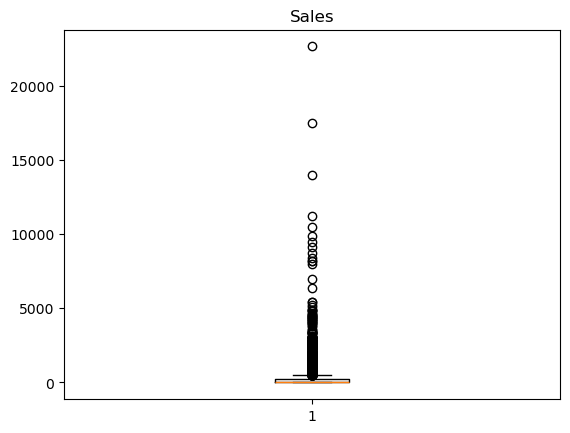

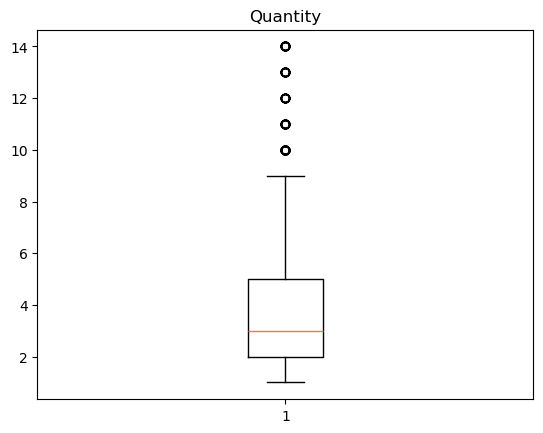

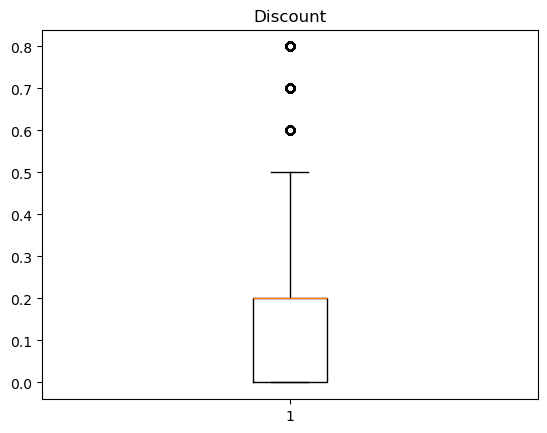

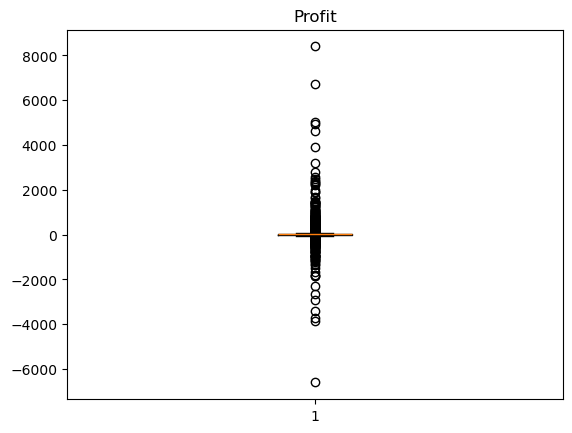

In [23]:
# Checking for Outliers in above numerical columns with box plot

plt.boxplot(df_sales_2_no_dups['sales'].dropna())
plt.title('Sales')
plt.show()

plt.boxplot(df_sales_2_no_dups['quantity'].dropna())
plt.title('Quantity')
plt.show()

plt.boxplot(df_sales_2_no_dups['discount'].dropna())
plt.title('Discount')
plt.show()

plt.boxplot(df_sales_2_no_dups['profit'].dropna())
plt.title('Profit')
plt.show()
            

### Sales: Plot shows many outlying data points that required investigation. It was found that these outlying plots represented sales of large lost profits or high than the average sale due to the items being bought in bulk and/or of high-end expensive items that resulted in large profits or loss. The box is very condensed with the median line appearing closer to the bottom showing that sales show to be on the lower item value. Based on the number of outliers, we can determine the data is right-skewed showing that the few large sales are pulling the mean higher with the majority of sales being in small sales.
### Quantity: The box appears to be almost centered between the upper and lower ranges showing that the data is fairly symmetrical about the median. The plot shows the general median quantity of orders is around 3 but can generally range between 2 to 5 or even as from 1 to 9. The plot shows a few outliers reaching as high as 14 that represent large bulk orders. 
### Discounts: Plot shows that the median of discounts appear to be around 20% and that discounts generally range from 0% to 20%, but have gone up as high as 50%. The plot does show a few outliers showing large discounts up to 80% that could be representing large clearance sales to clear inventory space. 
### Profit: The plot shows the median of profit is around 0 showing that half of the stores sales result in low profit or losses. The box is very condensed showing that sales with the IQR seeming to be very narrow and portraying profits clustered around the median with little variations. The plot shows a number of outliers ranging from high profit to large losses, possibly due to the large discounts causing large losses and high-end item sales or large bulk sales contributing to large profits. 

In [24]:
# Checking Frequency Counts for order related columns
pd.set_option('display.max_rows', None)

print(df_sales_2_no_dups['order_id'].value_counts(dropna=False))
print(df_sales_2_no_dups['order_date'].value_counts(dropna=False))
print(df_sales_2_no_dups['ship_date'].value_counts(dropna=False))
print(df_sales_2_no_dups['ship_mode'].value_counts(dropna=False))

order_id
CA-2017-100111    14
CA-2017-157987    12
US-2016-108504    11
CA-2016-165330    11
CA-2016-105732    10
CA-2015-131338    10
US-2015-126977    10
CA-2015-158421     9
US-2016-114013     9
US-2015-163433     9
CA-2015-164882     9
CA-2017-117457     9
CA-2017-140949     9
CA-2016-145177     9
CA-2014-106439     9
CA-2015-104346     9
CA-2015-132626     9
CA-2017-118017     8
CA-2015-121720     8
CA-2017-140872     8
CA-2017-110905     8
CA-2017-164756     8
CA-2014-129364     8
CA-2017-156776     8
US-2016-110156     8
CA-2016-152730     8
CA-2017-113278     8
CA-2017-102925     8
CA-2015-167010     8
CA-2014-142769     8
CA-2017-161956     8
US-2017-118087     8
CA-2014-167927     8
CA-2014-139892     7
CA-2015-124800     7
CA-2017-157966     7
CA-2016-145583     7
CA-2015-126557     7
US-2016-103674     7
US-2017-112347     7
CA-2017-151750     7
CA-2014-108189     7
US-2017-162558     7
CA-2017-112515     7
CA-2016-157749     7
US-2016-139087     7
CA-2014-160766     7
US-2

In [25]:
# Checking frequency counts for customer related columns
pd.set_option('display.max_rows', None)

print(df_sales_2_no_dups['customer_id'].value_counts(dropna=False))
print(df_sales_2_no_dups['customer_segment'].value_counts(dropna=False))

customer_id
WB-21850    37
JL-15835    34
MA-17560    34
PP-18955    34
CK-12205    32
SV-20365    32
JD-15895    32
EH-13765    32
ZC-21910    31
EP-13915    31
AP-10915    31
LC-16870    30
SH-19975    29
Dp-13240    29
BM-11650    29
GT-14710    29
KL-16645    29
KD-16495    28
CL-12565    28
KM-16720    28
CS-12250    28
XP-21865    28
DK-12835    27
BF-11170    27
PG-18820    26
LA-16780    26
NS-18640    26
SC-20725    26
CB-12025    26
RP-19390    25
CK-12595    25
EA-14035    25
AS-10090    25
PK-19075    25
SV-20785    25
SP-20860    24
SJ-20125    24
BH-11710    24
JA-15970    24
SP-20620    24
DR-12880    24
MS-17365    24
RL-19615    24
GG-14650    24
DK-13375    23
LC-16885    23
KB-16585    23
RB-19465    23
AH-10690    23
LB-16795    23
DH-13075    23
RW-19540    23
JE-15745    23
KH-16510    23
KL-16555    22
ME-17320    22
SM-20950    22
CC-12220    22
LS-16975    22
GA-14725    22
MH-18115    22
CS-11950    22
NW-18400    22
SC-20095    22
AM-10705    22
RA-19915    2

In [26]:
# Checking frequency counts for geographic related columns
pd.set_option('display.max_rows', None)

print(df_sales_2_no_dups['country'].value_counts(dropna=False))
print(df_sales_2_no_dups['city'].value_counts(dropna=False))
print(df_sales_2_no_dups['state'].value_counts(dropna=False))
print(df_sales_2_no_dups['postal_code'].value_counts(dropna=False))
print(df_sales_2_no_dups['region'].value_counts(dropna=False))

country
United States    9993
Name: count, dtype: int64
city
New York City        915
Los Angeles          747
Philadelphia         537
San Francisco        510
Seattle              428
Houston              377
Chicago              314
Columbus             221
San Diego            170
Springfield          163
Dallas               157
Jacksonville         125
Detroit              115
Newark                95
Richmond              90
Jackson               82
Columbia              81
Aurora                68
Phoenix               63
Long Beach            61
Arlington             60
San Antonio           59
Miami                 57
Louisville            57
Rochester             53
Charlotte             52
Henderson             51
Lakewood              49
Lancaster             46
Fairfield             45
Milwaukee             45
Denver                44
Lawrence              44
Baltimore             43
Cleveland             42
Pasadena              42
San Jose              42
Fayetteville  

In [27]:
# Checking frequency counts for Product related columns
pd.set_option('display.max_rows', None)

print(df_sales_2_no_dups['product_id'].value_counts(dropna=False))
print(df_sales_2_no_dups['category'].value_counts(dropna=False))
print(df_sales_2_no_dups['sub_category'].value_counts(dropna=False))
print(df_sales_2_no_dups['product_name'].value_counts(dropna=False))

product_id
OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
TEC-AC-10002049    15
FUR-CH-10001146    15
FUR-CH-10002647    15
TEC-AC-10003628    15
FUR-CH-10002880    14
FUR-FU-10001473    14
OFF-BI-10002026    14
OFF-BI-10001524    14
OFF-PA-10002377    14
OFF-BI-10004632    14
FUR-CH-10003774    14
TEC-AC-10003038    13
OFF-ST-10001490    13
OFF-BI-10000145    13
OFF-LA-10001613    13
OFF-BI-10000977    13
OFF-BI-10004728    13
FUR-TA-10001095    13
OFF-BI-10004970    13
FUR-FU-10004864    13
OFF-BI-10000301    13
OFF-BI-10004140    13
FUR-CH-10004287    13
FUR-CH-10000454    12
OFF-BI-10001658    12
OFF-PA-10000474    12
OFF-ST-10003208    12
OFF-ST-10000563    12
OFF-BI-10003291    12
TEC-AC-10004510    12
OFF-PA-10002195    12
OFF-ST-10003716    12
OFF-BI-10000546    12
FUR-FU-10004848    12
FUR-FU-10002364    12
OFF-BI-10004364    12
FUR-TA-10003473    12
OFF-BI-10003676    12
OFF-BI-10001597    12
OFF-PA-10000357    12
OFF-BI-10000343    12
OFF-BI-10002012    12

In [28]:
# Checking frequency counts for Sales related columns
pd.set_option('display.max_rows', None)

print(df_sales_2_no_dups['sales'].value_counts(dropna=False))
print(df_sales_2_no_dups['quantity'].value_counts(dropna=False))
print(df_sales_2_no_dups['discount'].value_counts(dropna=False))
print(df_sales_2_no_dups['profit'].value_counts(dropna=False))

sales
12.96       57
19.44       39
15.55       39
25.92       36
10.37       36
32.40       28
17.94       21
6.48        21
20.74       19
14.94       17
47.98       16
14.62       15
71.98       14
11.52       14
10.27       13
45.36       13
5.18        13
5.76        12
8.64        12
31.10       12
39.96       12
13.36       11
38.88       11
13.90       11
5.04        11
159.98      11
13.12       11
239.98      11
14.35       11
24.56       10
5.56        10
61.96       10
64.96       10
11.56       10
89.97       10
11.76       10
8.56        10
302.38      10
9.96        10
14.76        9
23.92        9
8.26         9
41.96        9
11.68        9
10.90        9
6.16         9
16.52        9
7.38         9
31.98        9
59.52        9
9.84         9
17.90        9
11.36        9
7.97         9
83.92        9
12.39        9
239.97       9
11.95        9
11.96        9
74.35        9
5.98         8
10.78        8
99.98        8
10.56        8
36.29        8
22.96        8
15.9

# 5. Deriving New Variable

In [29]:
# Creating new column for a customer's max number of orders

df_sales_2_no_dups['total_orders'] = df_sales_2_no_dups.groupby('customer_id')['order_id'].transform('size')

C:\Users\Drew\AppData\Local\Temp\ipykernel_23988\803657653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_2_no_dups['total_orders'] = df_sales_2_no_dups.groupby('customer_id')['order_id'].transform('size')


In [30]:
df_sales_2_no_dups.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,total_orders
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,5
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,5
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,9
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,15
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,15


In [31]:
df_sales_2_no_dups['total_orders'].describe()

count    9993.000000
mean       15.687882
std         6.652109
min         1.000000
25%        11.000000
50%        15.000000
75%        20.000000
max        37.000000
Name: total_orders, dtype: float64

In [32]:
# Creating customer orders behavioral frequency flag

df_sales_2_no_dups.loc[df_sales_2_no_dups['total_orders']<=10,'buyer_behavior_segment']='Occasional Buyer'
df_sales_2_no_dups.loc[(df_sales_2_no_dups['total_orders']>10)&(df_sales_2_no_dups['total_orders']<=20),'buyer_behavior_segment']='Consistent Buyer'
df_sales_2_no_dups.loc[df_sales_2_no_dups['total_orders']>20,'buyer_behavior_segment']='Loyal Buyers'

C:\Users\Drew\AppData\Local\Temp\ipykernel_23988\3933491749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_2_no_dups.loc[df_sales_2_no_dups['total_orders']<=10,'buyer_behavior_segment']='Occasional Buyer'


In [33]:
df_sales_2_no_dups.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_segment,country,city,state,postal_code,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,total_orders,buyer_behavior_segment
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,5,Occasional Buyer
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,5,Occasional Buyer
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,9,Occasional Buyer
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,15,Consistent Buyer
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,15,Consistent Buyer


In [34]:
df_sales_2_no_dups.shape

(9993, 21)

In [35]:
# checking for duplicates
df_dups_2=df_sales_2_no_dups[df_sales_2_no_dups.duplicated()]

In [36]:
# Printing duplicates 

df_dups_2

,order_id,order_date,ship_date,ship_mode,customer_id,customer_segment,country,city,state,postal_code,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,total_orders,buyer_behavior_segment


In [37]:
df_sales_2_no_dups.isnull().sum()

order_id                  0
order_date                0
ship_date                 0
ship_mode                 0
customer_id               0
customer_segment          0
country                   0
city                      0
state                     0
postal_code               0
region                    0
product_id                0
category                  0
sub_category              0
product_name              0
sales                     0
quantity                  0
discount                  0
profit                    0
total_orders              0
buyer_behavior_segment    0
dtype: int64

In [38]:
# Removing newly found missing values

df_sales_3_clean=df_sales_2_no_dups.dropna(inplace=False)

In [39]:
# Checking missing values have been removed

df_sales_3_clean.shape

(9993, 21)

In [42]:
df_sales_3_clean.dtypes

order_id                   object
order_date                 object
ship_date                  object
ship_mode                  object
customer_id                object
customer_segment           object
country                    object
city                       object
state                      object
postal_code                object
region                     object
product_id                 object
category                   object
sub_category               object
product_name               object
sales                     float64
quantity                    int64
discount                  float64
profit                    float64
total_orders                int64
buyer_behavior_segment     object
dtype: object

In [40]:
df_sales_3_clean.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_segment,country,city,state,postal_code,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,total_orders,buyer_behavior_segment
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,5,Occasional Buyer
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,5,Occasional Buyer
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,9,Occasional Buyer
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,15,Consistent Buyer
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,15,Consistent Buyer


# 6. Exporting Final Dataframe

In [41]:
# Export Dataframe

df_sales_3_clean.to_csv(os.path.join(path,'02 Data','Prepared Data','product_sales_cleaned.csv'))